# Анализ данных интернет-магазина «Стримчик» 

**Для формирования бюджета продаж на 2017 г.**

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. 
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
необходимо выявить определяющие успешность игры закономерности.
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

1. Данные: 

- /datasets/games.csv
- /datasets/rating.csv — данные о рейтинге ESRB

2. Подготовка данных:
    
    - Заменить названия столбцов

    - Посчитать количество продаж во всех регионах и запишите в отдельный столбец

    - Привести данные к нужным типам
    - Описать в каких столбцах пришлось заменить тип данных и почему
    
    - Обработать пропуски при необходимости. Описать причины возникновения пропусков

    
3. Исследовательский анализ данных

- распределение по годам релиза и опишите полученный результат
- распределение по годам релиза для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- соотнесите выводы с продажами игр на других платформах.
- посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


4. Портрет пользователя для каждого региона

- топ-5 предпочтительных жанров
- в какие года пользователи были наиболее активны (больше всего покупали игры)
- топ-5 предпочтительных платформ
- какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)


5. Гипотезы

- средний пользовательский рейтинг платформ PS2 и PS3 одинаковый;
- средний пользовательский рейтинг жанров Action и Sports различается
- пороговое значение alpha задать самостоятельно.

Комментарии:

- как формулировали нулевую и альтернативную гипотезы
- какой критерий использовали для проверки гипотез и почему

6. Выводы

###  Загрузка и изучение данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from scipy import stats as st

In [2]:
font = {'family': 'sans-serif',
        'color':  '#a72693',
        'weight': 'normal',
        'size': 20,
        }

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
games = pd.read_csv('/datasets/games.csv')
rating = pd.read_csv('/datasets/rating.csv')

In [5]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
# пропущенные значения
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [9]:
# проверка critic_score
games['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [10]:
# user_score проверка
games['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

*Cтолбец User_Score имеет строковый тип, а не вещественный. Выясним почему он имеет не правильный тип.*

In [11]:
games.sort_values(by='User_Score', ascending=False).reset_index().head(10)

,index,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,16706,Men in Black II: Alien Escape,GC,"2,003.00",Shooter,0.01,0.00,0.00,0.00,NaN,tbd,T
1,10948,The Revenge of Shinobi,GBA,"2,002.00",Platform,0.07,0.02,0.00,0.00,51.00,tbd,E
2,3955,Disney Sing It,PS2,"2,008.00",Misc,0.25,0.19,0.00,0.06,NaN,tbd,E
3,10850,NFL Blitz 20-02,XB,"2,002.00",Sports,0.07,0.02,0.00,0.00,77.00,tbd,E
4,10847,Just Dance 2017,WiiU,"2,016.00",Misc,0.03,0.06,0.00,0.01,NaN,tbd,E10+
5,10845,Rocky,GC,"2,002.00",Fighting,0.07,0.02,0.00,0.00,74.00,tbd,T
6,10843,thinkSMART,DS,"2,010.00",Misc,0.09,0.00,0.00,0.01,NaN,tbd,E
7,10826,Shox,PS2,"2,002.00",Racing,0.05,0.04,0.00,0.01,78.00,tbd,E
8,10812,Bejeweled Twist,DS,"2,010.00",Puzzle,0.00,0.08,0.00,0.01,77.00,tbd,E
9,10807,Alvin and the Chipmunks: The Squeakquel,Wii,"2,009.00",Misc,0.09,0.00,0.00,0.01,NaN,tbd,E


*После сортировки таблицы, видно что некоторые значения столбца user_score имеют строковые значения tbd(To Be Determined)*

In [12]:
# поиск дублтикатов
games.duplicated().sum()

0

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />   
На рабочих проектах стоит искать дубликаты по ключевым столбцам, для примера по сумме параметров: 
   
    ['name', 'platform', 'year_of_release']
    
С обязательным приведением содержимого категориальных колонок к нижнему регистру
        
В сырой выборке имеется 2 строчки неполных дубликатов
        
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html?highlight=duplicat#pandas.DataFrame.duplicated
    

In [13]:
# поиск дубликатов по ключевым столбцам
duplicate_rows = games[games.duplicated(['Name', 'Platform', 'Year_of_Release'])]
duplicate_rows.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,"2,012.00",Sports,0.00,0.01,0.00,0.00,83.00,5.5,E


In [14]:
del duplicate_rows

*В данном случае действий предпринимать не будем, потому что в предобработке стрки с пропущенными именами и жанром будут удалены*

In [15]:
rating.head()

,rating_type,decryption
0,E,Для всех
1,M,От 17 лет
2,T,Подросткам 13—19 лет
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)


In [16]:
rating.describe()

,rating_type,decryption
count,8,8
unique,8,8
top,T,Для всех старше 10 лет
freq,1,1


In [17]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rating_type  8 non-null      object
 1   decryption   8 non-null      object
dtypes: object(2)
memory usage: 256.0+ bytes


**Выводы по итогам загрузки и изучения данных**


***Таблица games***

- Содержит 16715 строк.

- Названия столбцов привести к нижнему регистру

- Столбец Year_of_Release (год выпуска) привести к типу int.

- Пропущенные значения Year_of_Release заполнить , например, 1900 годом, чтобы было понятно - год не заполнен

- Столбец User_Score (оценка пользователей) заменить tbd на NaN, чтобы иметь возможность проводить математические операции, привести к вещественному типу.

- Строки с пустым значением Name, Genre удалить как несущественные. 

- Пустые строки Critic_Score и User_Score не удаляем. Иначе, много пропущенных значений (ок 50-70%%) и изменение будет существенным для статистики. По аналогии с годом сделаем метку(отсутствие score) -10

In [18]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')
        );
    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

### Обработка данных

In [20]:
# приведение названий в games к нижнему регистру
games.columns = games.columns.str.lower()

In [21]:
# проверка
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [22]:
# приведение year_of_release к целочисленному типу
games['year_of_release'] = games['year_of_release'].astype('Int32')

In [23]:
# user_score заменить tbd на NaN, привести к вещественному типу.
games['user_score'] = games['user_score'].replace('tbd', np.nan, regex=True)
games['user_score'] = games['user_score'].astype('float64')

In [24]:
# удалить пустые значения в столбцах name, genre
games = games.dropna(subset=['name', 'genre']).reset_index(drop=True)

In [25]:
# замена пустых значений в годе выпуска
games['year_of_release'] = games['year_of_release'].fillna(1900)

In [26]:
# замена пустых значений в critic_score и user_score
games['critic_score'] = games['critic_score'].fillna(-10)
games['user_score'] = games['user_score'].fillna(-10)

In [27]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.4+ MB


**NB! при анализе пропустили строку rating - примерно 60% заполненных значений, удалять нецелесообразно, по аналогии с предыдущими заполним 'no rating'**

In [28]:
games['rating'] = games['rating'].fillna('no rating')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.4+ MB


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Отличное решение для столбца, который содержит категориальные данные, поможет определить ключевое различие в потрете пользователя
        
        games['rating'] = games['rating'].fillna('no rating')
        
Можно посмотреть на частотность использования категорий рейтинга, по отношению к остальным
        
        EC         8
        K-A        3
        RP         1
        AO         1

In [29]:
# посчитать количество продаж во всех регионах и записать в отдельный столбец
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-10.00,-10.00,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-10.00,-10.00,no rating,31.38


**Выводы по предобработке данных:**

- year_of_release - дискретные переменные привели к целочисленному типу
- user_score - привели к вещественному типу, 'tbd' заменить на NaN
- удалили пропущенные значения в следующих столбцах 'name', 'genre'
- year_of_release, critic_score, user_score и rating пропущенные значения заменили на индикативные метки

### Исследовательский анализ данных

- распределение по годам релиза и опишите полученный результат
- график продаж по каждому году; сделайте вывод
- ящик с усами по глобальным продажам, опишите полученный результат
- посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- использовать данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- соотнесите выводы с продажами игр на других платформах.
- посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Text(0.5, 0, 'Год')

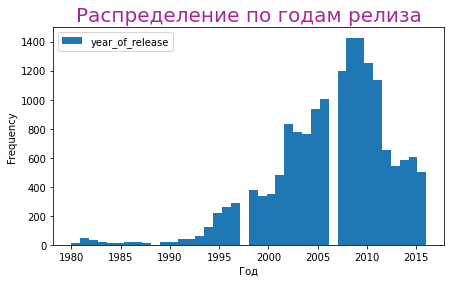

In [30]:
# распределение по годам релиза
games[games['year_of_release'] != 1900]['year_of_release'].plot(kind='hist', bins=40, figsize=(7,4)).legend()
plt.title('Распределение по годам релиза', fontdict=font)
plt.xlabel('Год')

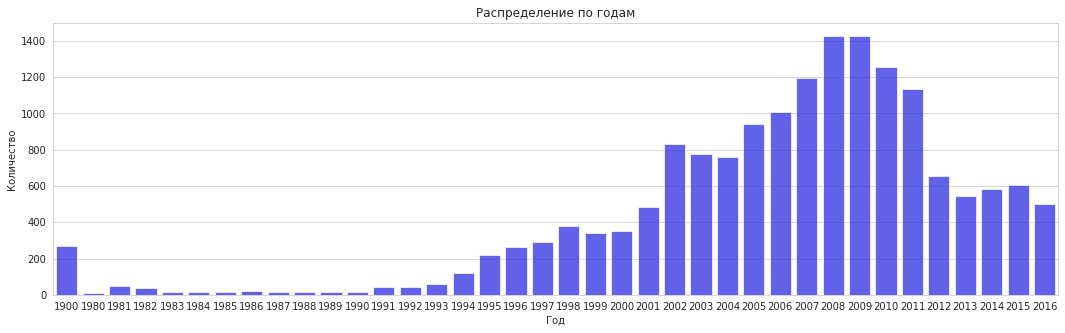

In [31]:
import warnings
warnings.simplefilter(action='ignore')

def draw_graph_countplot(value, name_x, name_y, title):
    plt.figure(figsize=(18, 5))
    sns.set_style('whitegrid')
    sns.countplot(value, color = 'blue',alpha = 0.7)
    plt.title(title)
    plt.xlabel(name_x)
    plt.ylabel(name_y)
    
draw_graph_countplot(games.year_of_release, 'Год', 'Количество', 'Распределение по годам')

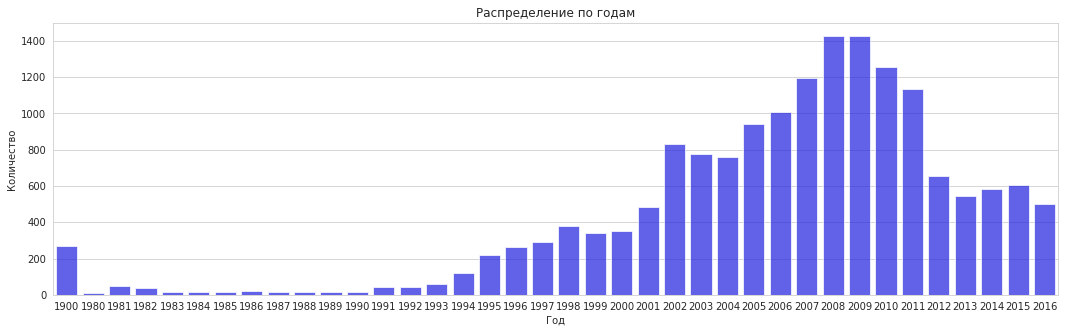

In [32]:
# check

draw_graph_countplot(games['year_of_release'], "Год", "Количество", "Распределение по годам")

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Можно исключить лишнее обозначение переменных
        
        title = "Распределение по годам"
        name_x = "Год"
        name_y = "Количество"

***Выводы:***

*Распределение не является нормальным. Игры пояились в 80-ых, затем развитие технологии. С 95-года развитие видеоадаптеров, соответственно график релизов тоже рос. С 2008 года спад в консольных играх, переход на мобильные платформы. Количество с мектой 1900 г не оказывает существенного влияния на график*

Text(0, 0.5, 'Продажи, млн. копий')

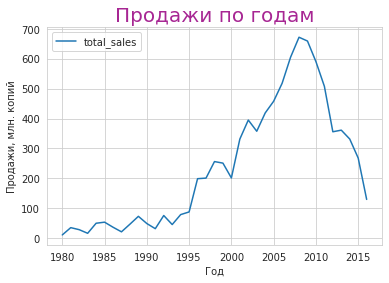

In [33]:
# график продаж по каждому году
games[games['year_of_release'] != 1900].groupby('year_of_release').agg({'total_sales':'sum'}).plot()
plt.title('Продажи по годам', fontdict=font)
plt.xlabel('Год')
plt.ylabel('Продажи, млн. копий')

**Вывод:**

- после набирающего темп роста продажи каждый год падают после 2008 г.

,platform,total_sales
0,PS2,2161
1,DS,2151
2,PS3,1331
3,Wii,1320
4,X360,1262


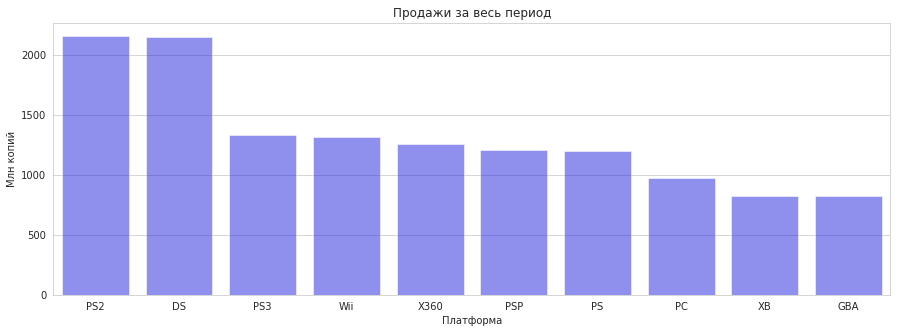

In [34]:
# продажи по платформам
platforms = games.pivot_table(
    index='platform', values='total_sales', aggfunc = 'count').sort_values(by='total_sales', ascending=False).reset_index()[:10]
plt.figure(figsize=(15, 5))
sns.barplot(x=platforms.platform, y=platforms.total_sales, color = 'blue', alpha = 0.5)
plt.xlabel("Платформа")
plt.ylabel("Mлн копий")
plt.title("Продажи за весь период")
platforms.head()

**Вывод:**

- playstation 2 на первом месте с общим количеством 2161 игра. В пятерке DS, PS3, Wii, X360. Лидеры Sony и Microsoft.

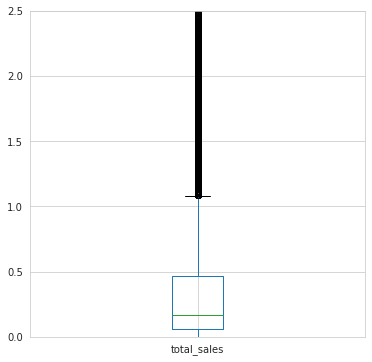

In [35]:
# ящик с усами по глобальным продажам
plot = games.boxplot('total_sales', figsize=(6, 6)).set_ylim(0, 2.5)

In [36]:
games.total_sales.describe()

count   16,713.00
mean         0.53
std          1.55
min          0.00
25%          0.06
50%          0.17
75%          0.47
max         82.54
Name: total_sales, dtype: float64

**Вывод:**

- характерны выбросы (медиана 0.17 млн. копий, max 82.5 млн. копий), что, возможно, обьясняется выпуском блокбастеров

In [37]:
# платформы с наибольшими суммарными продажами и постройте распределение по годам
top_platforms = ['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA']
top_platforms_sales = pd.DataFrame(
    games[games['year_of_release'] != 1900].groupby(['platform','year_of_release']
)['total_sales'].sum()).query('platform in @top_platforms').reset_index()
top_platforms_sales

,platform,year_of_release,total_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94
...,...,...,...
117,XB,2004,65.42
118,XB,2005,49.08
119,XB,2006,10.04
120,XB,2007,0.55


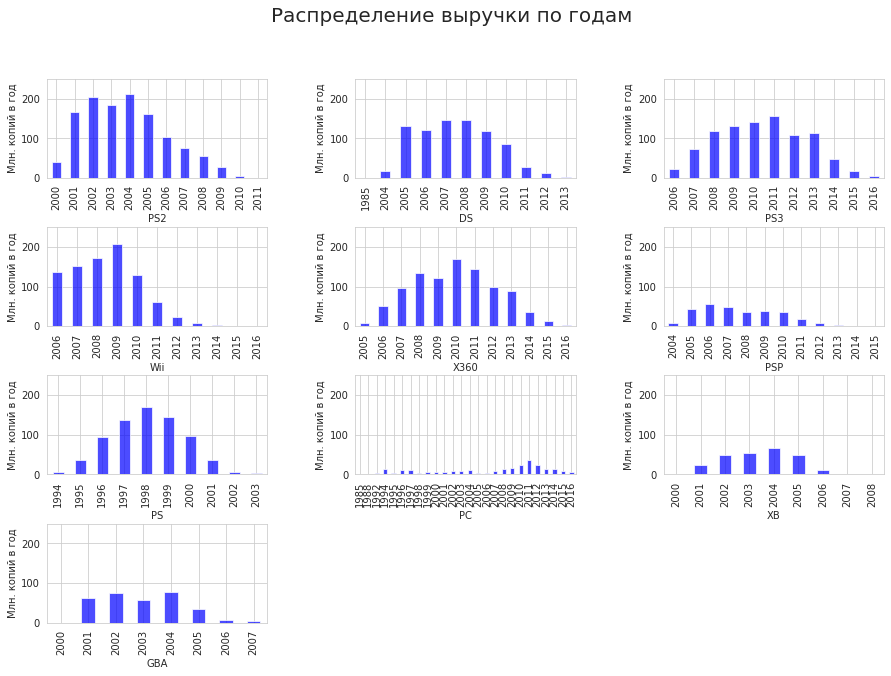

In [38]:
plt.figure(figsize = (15, 10)).suptitle('Распределение выручки по годам', fontsize = 20, x = 0.5)
plt.subplots_adjust(hspace=0.5, wspace=0.4)

def draw_graph(i, name):
    plt.subplot(4, 3, i)
    top_platforms_sales.query('platform == @name')\
                 .groupby('year_of_release')['total_sales'].sum()\
                 .plot( kind='bar', color='blue', alpha = 0.7)
    plt.xlabel(name)
    plt.ylabel('Млн. копий в год')
    plt.ylim(0, 250)

def create_graphs():
    i = 1
    for name in top_platforms:
        draw_graph(i, name)
        i += 1
        
create_graphs()

***Вывод:***

- в среднем срок жизни платформы около 10 лет. Исключение составляют компьютерные игры и Sega (как родоначальники).

***Проверка выброса платформы DS в 1985 г. - официально год выхода Nintendo DS конец 2004 г.***

In [39]:
# проверка DS в 1985 г.
df_check_ds = games[(games['platform']=='DS')&(games['year_of_release']==1985)]
df_check_ds

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15955,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,-10.00,-10.00,no rating,0.02


In [40]:
# исключим лишнюю строку
games = games.drop (index= 15955 ).reset_index(drop=True)
games.shape

(16712, 12)

***Ограничение!!!***
***Определить, данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году.***


*Взят горизонт 3 года. Достаточно, чтобы увидеть тренды.*

In [41]:
# горизонт 3 года
historic_limit = (2014, 2016)
historic_data = games.query('@historic_limit[0] <= year_of_release <= @historic_limit[1]').reset_index()
historic_data = historic_data.drop('index', 1)
historic_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-10.00,-10.00,no rating,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-10.00,-10.00,no rating,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-10.00,-10.00,no rating,7.98
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.00,5.70,M,7.66
6,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.00,5.00,E,7.60
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,-10.00,-10.00,no rating,7.55
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-10.00,-10.00,no rating,7.39
9,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.00,6.50,M,7.17


Text(0, 0.5, 'Млн. копий')

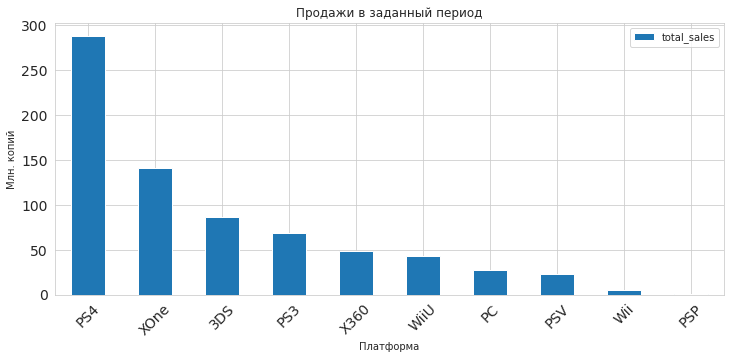

In [42]:
# доход по каждой платформе за заданный период
historic_data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(
    by = 'total_sales', ascending = False
).reset_index().plot(x='platform', kind='bar', rot=45, fontsize=14, figsize=(12,5))
plt.title('Продажи в заданный период')
plt.xlabel('Платформа')
plt.ylabel('Млн. копий')

In [43]:
#таблица распределения продаж по годам и платформе 
sales = historic_data.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
sales 

total_sales
platform year_of_release             
3DS      2014                   43.76
         2015                   27.78
         2016                   15.14
PC       2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2014                    0.24
         2015                    0.12
PSV      2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2014                   54.07
         2015                   60.14
         2016                   26.15

***Ниже график по основным платформам (PSP исключил  т.к. продажи падают)***

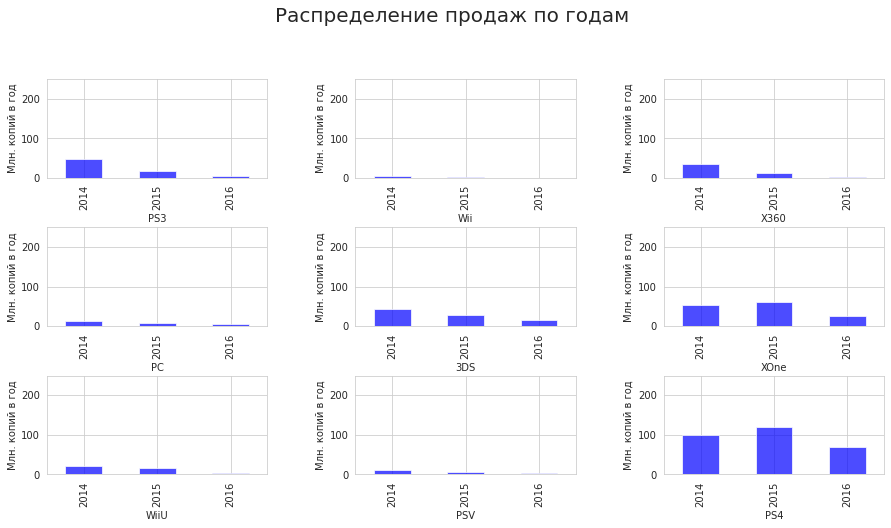

In [44]:
# график по основным платформам
platforms = ['PS3', 'Wii', 'X360', 'PC', '3DS', 'XOne', 'WiiU', 'PSV', 'PS4']
plt.figure(figsize = (15, 10)).suptitle('Распределение продаж по годам', fontsize = 20, x = 0.5)
plt.subplots_adjust(hspace=0.5, wspace=0.4)

def draw_graph(i, name):
    plt.subplot(4, 3, i)
    sales.query('platform == @name')\
                 .groupby('year_of_release')['total_sales'].sum()\
                 .plot( kind='bar', color='blue', alpha = 0.7)
    plt.xlabel(name)
    plt.ylabel('Млн. копий в год')
    plt.ylim(0, 250)

def create_graphs():
    i = 1
    for name in platforms:
        draw_graph(i, name)
        i += 1
        
create_graphs()

### **Вывод:**

- продажи в горизонте 3 лет падают. Пиковые продажи у лидеров PS4 и XOne в 2014, 2015 г. отражают жизненный цикл продукта. Если данные за 2016 г. неполные, то возможно продажи по этим двум приставкам будут сопоставимы с 2015 г.(исходя из срока жизни 10 лет).

- перечень перспективных платформ для маркетинга и продаж: PS4, XOne, 3DS. Рынок PC является стабильным на протяжении 30 лет, на него тоже стоит обратить внимание.

Text(0.5, 1.0, 'Ящик с усами - глобальные продажи после 2011 г.')

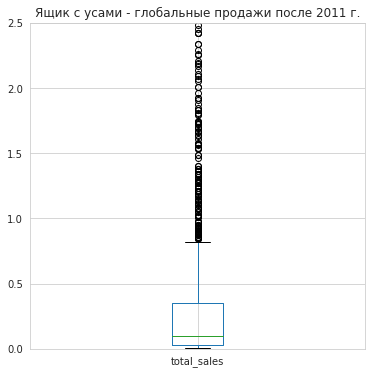

In [45]:
# ящик с усами по глобальным продажам после 2014 г.
historic_data.boxplot('total_sales', figsize=(6, 6)).set_ylim(0, 2.5)
plt.title('Ящик с усами - глобальные продажи после 2011 г.')

In [46]:
historic_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,"1,689.00","1,689.00","1,689.00","1,689.00","1,689.00","1,689.00","1,689.00","1,689.00"
mean,"2,014.95",0.17,0.16,0.06,0.05,24.99,-1.26,0.43
std,0.80,0.45,0.47,0.21,0.14,41.47,8.38,1.06
min,"2,014.00",0.00,0.00,0.00,0.00,-10.00,-10.00,0.01
25%,"2,014.00",0.00,0.00,0.00,0.00,-10.00,-10.00,0.03
50%,"2,015.00",0.02,0.02,0.01,0.01,-10.00,3.40,0.10
75%,"2,016.00",0.12,0.12,0.04,0.04,71.00,7.10,0.35
max,"2,016.00",6.03,6.31,3.18,2.38,97.00,9.30,14.63


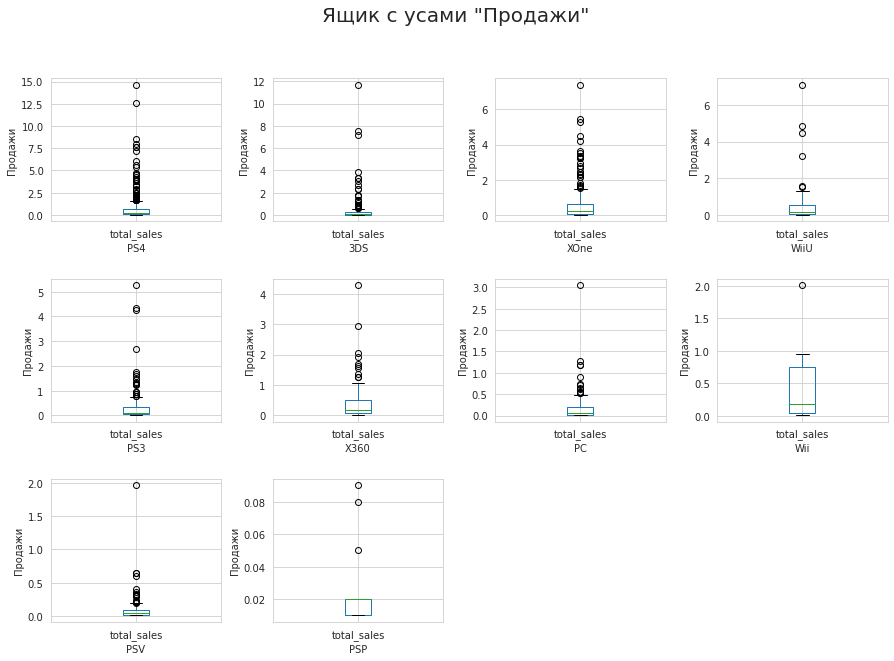

In [47]:
#  график «ящик с усами» по глобальным продажам игр за 3 года в разбивке по платформам
plt.figure(figsize = (15, 10)).suptitle('Ящик с усами "Продажи"', fontsize = 20, x = 0.5)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

def box_plot(i, name):
    plt.subplot(3, 4, i)
    plt.xlabel(name)
    plt.ylabel('Продажи')
    historic_data.query('platform == @name').boxplot(column = 'total_sales')
    

def draw_chart():
    i = 1
    for name in historic_data['platform'].unique():
        box_plot(i, name)
        i += 1
        
draw_chart()

<div class="alert alert-dang er">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
К сожалению, на этих графиках видны только выбросы, и совсем не видны медиана и 75% квантиль, плюс тяжело сравнивать разрозненные ящики между собой                 
       
__Для более обоснованных выводов  стоит  перерисовать диаграмму размаха__, на актуальной выборке:
        
+ используя параметр by, который позволит сравнить ящики всех жанров на одном виде, 
+ в двух масштабах: 
    + 100% 
    + и где будет отображена только нижняя часть boxplot-ов
        
      
Оба вида важны, т.к. выбросы — это наши звезды, которые приносят максимум выручки        
        
оставил ссылку на примеры
              
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html?highlight=boxplo#pandas.DataFrame.boxplot
           
        
для изменения масштаба стоит применить ylim()
            
https://matplotlib.org/stable/gallery/pyplots/axline.html#sphx-glr-gallery-pyplots-axline-py

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправил ниже. Убрал выбросы, оставил боксплоты через масштаб.

Text(0, 0.5, 'Продажи')

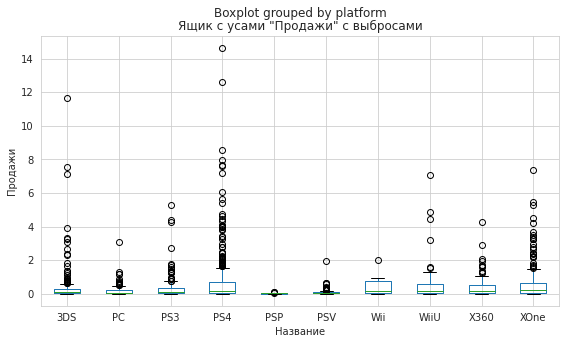

In [48]:
# график «ящик с усами» по глобальным продажам игр за 3 года в разбивке по платформам
historic_data.boxplot(by='platform', column = 'total_sales', figsize = (9, 5));
plt.title('Ящик с усами "Продажи" с выбросами')
plt.xlabel('Название')
plt.ylabel('Продажи')

(0.0, 0.8)

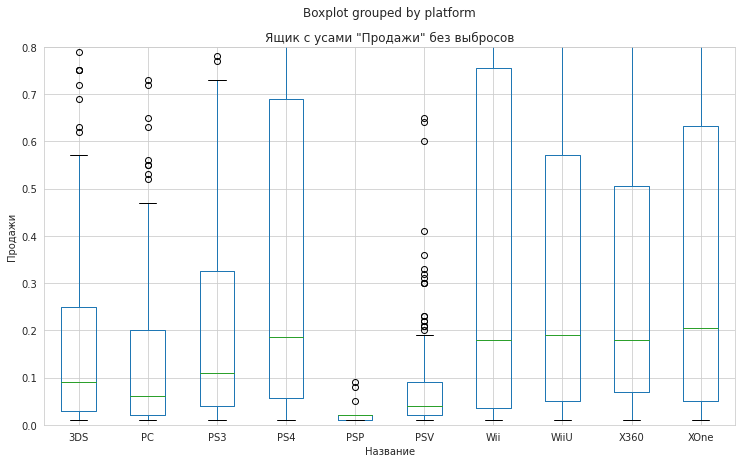

In [49]:
# график «ящик с усами» ,без выбросов по глобальным продажам игр за 3 года в разбивке по платформам
historic_data.boxplot(by='platform', column = 'total_sales', figsize = (12, 7));
plt.title('Ящик с усами "Продажи" без выбросов')
plt.xlabel('Название')
plt.ylabel('Продажи')
plt.ylim([0, 0.8])

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Что показывают нам две диаграммы размаха — кол-во выбросов, это игры, которые принесли максимум выручки. Т.е. можно платформы/жанры сравнить по кол-ву игр-рекордсменов, а значит определить, какая из них способна выпустить наиболее привлекательные для игроманов игры. Это про выбросы
        
Второй вид мы используем для того, чтобы сравнить медианные продажи по платформе/жанру, чтобы уточнить в каком кол-ве продаются игры на платформе/жанре, какая из них более стабильна в продажах...
        
        
Две хорошие статьи про диаграмму размаха
        
[Ящики, усы и скрипки](https://habr.com/ru/articles/533726/) 
        
[Исследуем отношение между переменными](https://dfedorov.spb.ru/pandas/downey/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D1%83%D0%B5%D0%BC%20%D0%BE%D1%82%D0%BD%D0%BE%D1%88%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.html?)
       

In [50]:
for name in historic_data['platform'].unique():
    p = historic_data.query('platform == @name')
    print('Платформа', name)
    print(p['total_sales'].describe())
    print(' ')

Платформа PS4
count   376.00
mean      0.77
std       1.61
min       0.01
25%       0.06
50%       0.18
75%       0.69
max      14.63
Name: total_sales, dtype: float64
 
Платформа 3DS
count   212.00
mean      0.41
std       1.19
min       0.01
25%       0.03
50%       0.09
75%       0.25
max      11.68
Name: total_sales, dtype: float64
 
Платформа XOne
count   228.00
mean      0.62
std       1.05
min       0.01
25%       0.05
50%       0.20
75%       0.63
max       7.39
Name: total_sales, dtype: float64
 
Платформа WiiU
count   73.00
mean     0.59
std      1.16
min      0.01
25%      0.05
50%      0.19
75%      0.57
max      7.09
Name: total_sales, dtype: float64
 
Платформа PS3
count   219.00
mean      0.31
std       0.63
min       0.01
25%       0.04
50%       0.11
75%       0.33
max       5.27
Name: total_sales, dtype: float64
 
Платформа X360
count   111.00
mean      0.43
std       0.63
min       0.01
25%       0.07
50%       0.18
75%       0.51
max       4.28
Name: total_sales, dt

**Вывод:**

- средние продажи в мире на одну игру составляют 0.5 млн. копий. Максимальные 21 млн. копий.
- выбросы, хатактеризующие 'звезд' с точки зрения продаж, у *PS4, XOne, 3DS*
- медиана у топов в р-не .2 млн копий
- по верхней границе выделяются *PS4, Wii и XOne*


- средние продажи PS4 на одну игру составляют 0.8 млн. копий. Максимальные 14.63 млн. копий.
- средние продажи Wii на одну игру составляют 0.48 млн. копий. Максимальные 10.12 млн. копий.
- средние продажи DS на одну игру составляют 0.21 млн. копий. Максимальные 8.06 млн. копий.
- средние продажи PS3 на одну игру составляют 0.63 млн. копий. Максимальные млн. 21 копий. 
- средние продажи XOne на одну игру составляют 0.65 млн. копий. Максимальные 7.39 млн. копий.
- средние продажи WiiU на одну игру составляют 0.56 млн. копий. Максимальные 7.09 млн. копий.
- средние продажи X360 на одну игру составляют 0.76 млн. копий. Максимальные 16.27 млн. копий.
- средние продажи 3DS на одну игру составляют 0.5 млн. копий. Максимальные 14.6 млн. копий.

# example 1

#### example 3

##### example 4

Text(0.5, 0, 'Продажи')

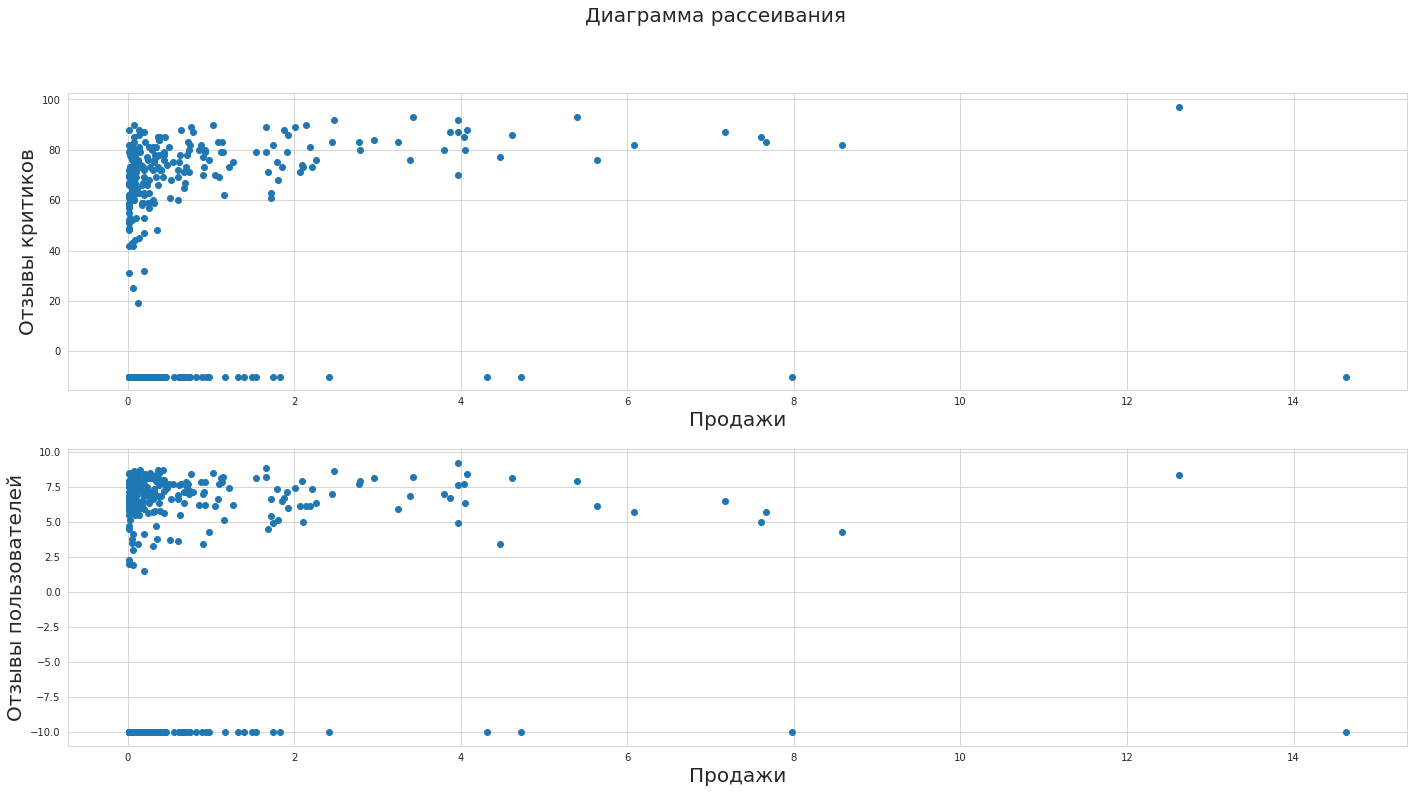

In [51]:
# как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
# PS4 (самый высокий средний обьем продаж)
fig_scatter, (scatter_ax,scatter_ax2) = plt.subplots(2,1, figsize = (24,12))
fig_scatter.suptitle('Диаграмма рассеивания', fontsize = 20)
scatter_ax.scatter(
    y= 'critic_score', x = 'total_sales',data = historic_data.query('platform == "PS4"')
)
scatter_ax2.scatter(
    y= 'user_score', x = 'total_sales',data = historic_data.query('platform == "PS4"')
)
scatter_ax.set_ylabel('Отзывы критиков', fontsize = 20)
scatter_ax2.set_ylabel('Отзывы пользователей', fontsize = 20)
scatter_ax.set_xlabel('Продажи', fontsize = 20)
scatter_ax2.set_xlabel('Продажи', fontsize = 20)

Text(0.5, 0, 'Продажи')

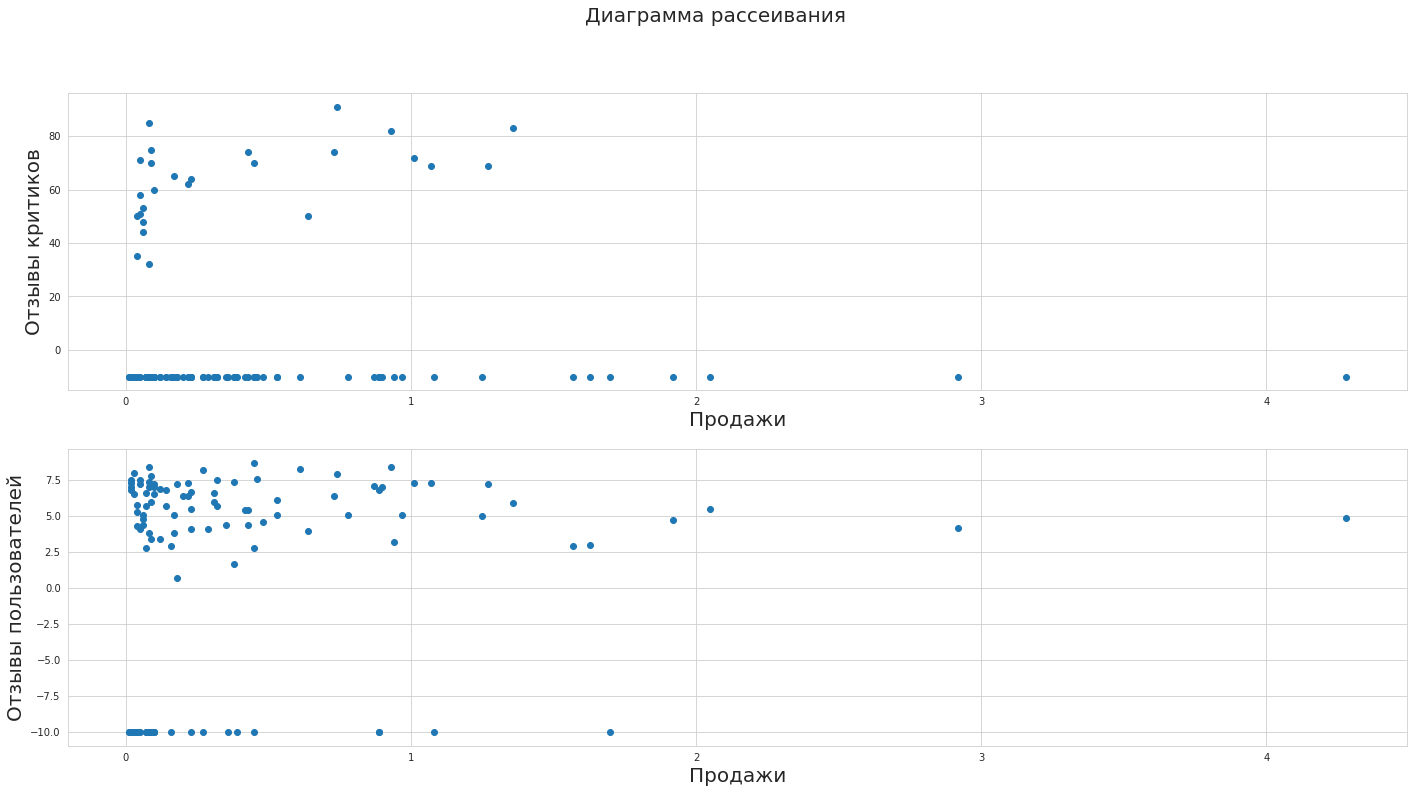

In [52]:
# как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
# X360 (2-й средний обьем продаж)
fig_scatter, (scatter_ax,scatter_ax2) = plt.subplots(2,1, figsize = (24,12))
fig_scatter.suptitle('Диаграмма рассеивания', fontsize = 20)
scatter_ax.scatter(
    y= 'critic_score', x = 'total_sales',data = historic_data.query('platform == "X360"')
)
scatter_ax2.scatter(
    y= 'user_score', x = 'total_sales',data = historic_data.query('platform == "X360"')
)
scatter_ax.set_ylabel('Отзывы критиков', fontsize = 20)
scatter_ax2.set_ylabel('Отзывы пользователей', fontsize = 20)
scatter_ax.set_xlabel('Продажи', fontsize = 20)
scatter_ax2.set_xlabel('Продажи', fontsize = 20)

In [53]:
# PS4
PS4_ratings = historic_data[
    (historic_data['critic_score']>=0)|(historic_data['user_score']>=0)
].query('platform == "PS4"').loc[:,['total_sales', 'critic_score', 'user_score']]
PS4_ratings.head(10)

,total_sales,critic_score,user_score
1,12.62,97.00,8.30
3,8.58,82.00,4.30
5,7.66,83.00,5.70
6,7.60,85.00,5.00
9,7.17,87.00,6.50
12,6.08,82.00,5.70
13,5.64,76.00,6.10
15,5.39,93.00,7.90
20,4.62,86.00,8.10
22,4.47,77.00,3.40


In [54]:
# X360
X360_ratings = historic_data[
    (historic_data['critic_score']>=0)|(historic_data['user_score']>=0)
].query('platform == "X360"').loc[:,['total_sales', 'critic_score', 'user_score']]
X360_ratings.head(10)

,total_sales,critic_score,user_score
26,4.28,-10.00,4.90
54,2.92,-10.00,4.20
79,2.05,-10.00,5.50
84,1.92,-10.00,4.70
106,1.63,-10.00,3.00
110,1.57,-10.00,2.90
123,1.36,83.00,5.90
138,1.27,69.00,7.20
141,1.25,-10.00,5.00
163,1.07,69.00,7.30


In [55]:
# корреляция
PS4_ratings.corr()

,total_sales,critic_score,user_score
total_sales,1.00,0.33,0.02
critic_score,0.33,1.00,0.22
user_score,0.02,0.22,1.00


In [56]:
# корреляция
X360_ratings.corr()

,total_sales,critic_score,user_score
total_sales,1.00,-0.06,-0.14
critic_score,-0.06,1.00,0.21
user_score,-0.14,0.21,1.00


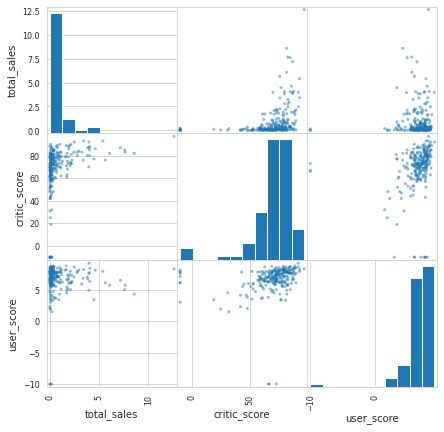

In [57]:
# график
pd.plotting.scatter_matrix(PS4_ratings, figsize=(7, 7));

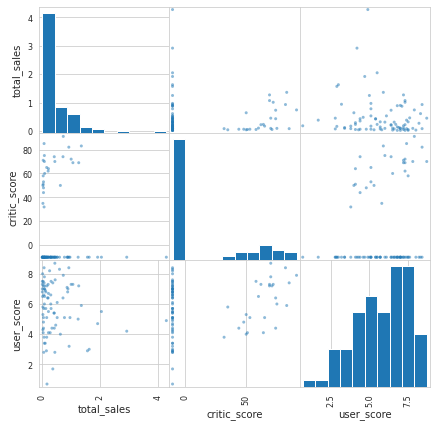

In [58]:
# график
pd.plotting.scatter_matrix(X360_ratings, figsize=(7, 7));

**Вывод:**

- На примере анализа 2-х платформ PS4 и X360 имеется положительная корреляция между отзывами критиков и продажами с коэффициентом 0.4, корреляция между отзывами юзеров и продажами отсутствует.

- Делать выводы о том что критики влияют на продажи нецелесообразно, учитывая ограниченный обьем данных

In [59]:
# игр какого жанра больше всего
genres = historic_data.pivot_table(
    index='genre', values='name', aggfunc = 'count').reset_index()
genres.sort_values(by='name', ascending=False).head()

,genre,name
0,Action,619
7,Role-Playing,221
1,Adventure,185
10,Sports,161
8,Shooter,128


Text(0, 0.5, 'Количество')

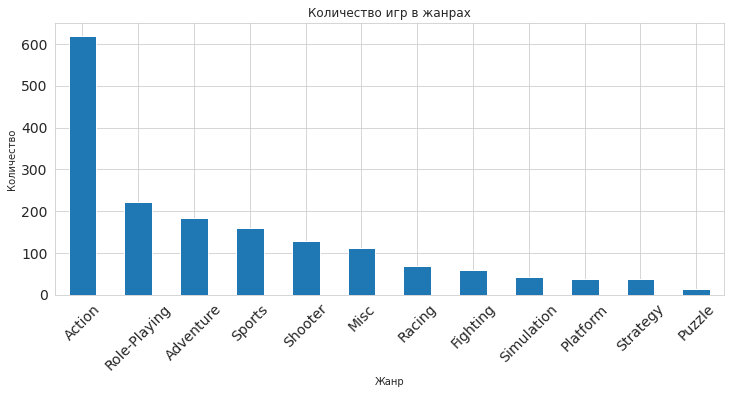

In [60]:
# график за 5 лет
plt.figure(figsize=(15, 5))
historic_data.genre.value_counts().plot(x='genre', kind='bar', rot=45, fontsize=14, figsize=(12,5))
plt.title('Количество игр в жанрах')
plt.xlabel('Жанр')
plt.ylabel('Количество')

**Вывод:**

- в первой пятерке Action,  Ролевые,  Приключения, Sports, Misc

In [61]:
# самые прибыльные жанры
genres = historic_data.pivot_table(
    index='genre', values='total_sales', aggfunc = 'mean').reset_index()
genres.sort_values(by='total_sales', ascending=False).head()

,genre,total_sales
8,Shooter,1.34
10,Sports,0.68
4,Platform,0.48
2,Fighting,0.47
7,Role-Playing,0.46


Text(0, 0.5, 'Продажи')

<Figure size 1080x360 with 0 Axes>

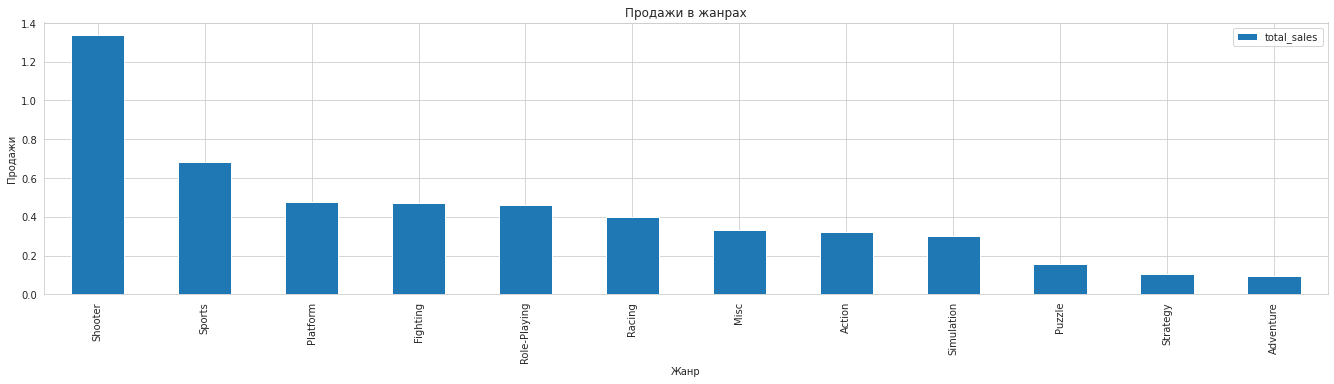

In [62]:
# график за 5 лет по самым прибыльным жанрам
plt.figure(figsize=(15, 5))
genres.sort_values(by='total_sales', ascending=False).plot(x='genre', y='total_sales', kind='bar', figsize=(23, 5))
plt.title('Продажи в жанрах')
plt.xlabel('Жанр')
plt.ylabel('Продажи')

**Вывод:**

- в первой пятерке Shooter, Platform, Sports, Role, Racing. Отличается от предыдущего графика с количеством.

Text(0, 0.5, 'Продажи')

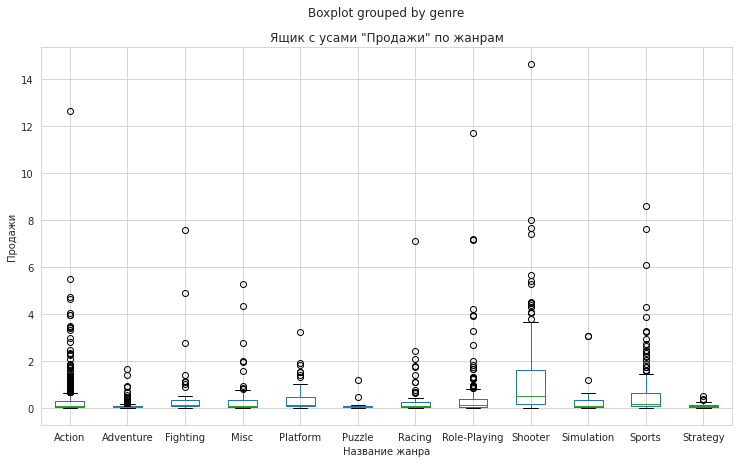

In [63]:
# прибыльность жанров на диаграмме размаха
historic_data.boxplot(by='genre', column = 'total_sales', figsize=(12, 7));
plt.title('Ящик с усами "Продажи" по жанрам')
plt.xlabel('Название жанра')
plt.ylabel('Продажи')
# plt.ylim([0, 0.8])

(0.0, 1.75)

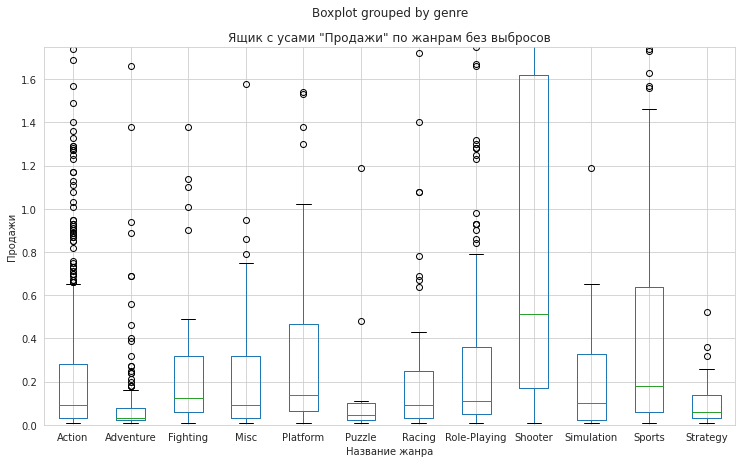

In [64]:
# прибыльность жанров на диаграмме размаха с выделение квартилей
historic_data.boxplot(by='genre', column = 'total_sales', figsize=(12, 7));
plt.title('Ящик с усами "Продажи" по жанрам без выбросов')
plt.xlabel('Название жанра')
plt.ylabel('Продажи')
plt.ylim([0, 1.75])

**Вывод:**

- звезды с точки зрения продаж Shooter, Action и Sports. Стабильные продажи у шутеров, спортивных игр.

- Медиана  варьируется от 0,1 до 0,2 млн копий, за исключением Shooter c 0.5 млн. и низкими занчениями у аутсайдеров.

- Верхняя граница у топ: 1.6 млн. копий у Shooter, 0.6 у Sports и 0.26 Action. Выделяются по верхней границе Platform 0.47 и Role 0.36 млн. копий.

### Составить портрет пользователя регионов NA, EU, JP 

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Text(0, 0.5, 'Продажи')

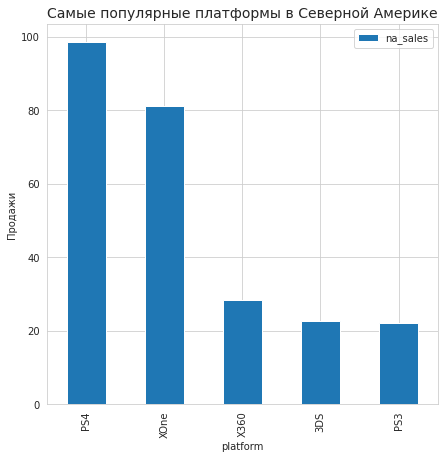

In [65]:
# топ популярных платформ Северная Америка
na_sales = historic_data.query('na_sales > 0')
customer_na_platform = pd.pivot_table(
    na_sales, index='platform', values='na_sales', aggfunc='sum'
).sort_values('na_sales', ascending=False).reset_index()
customer_na_platform[:5].plot(x='platform', y='na_sales', kind='bar', figsize=(7, 7))
plt.title('Самые популярные платформы в Северной Америке', size=14)
plt.ylabel('Продажи')

Text(0, 0.5, 'Продажи')

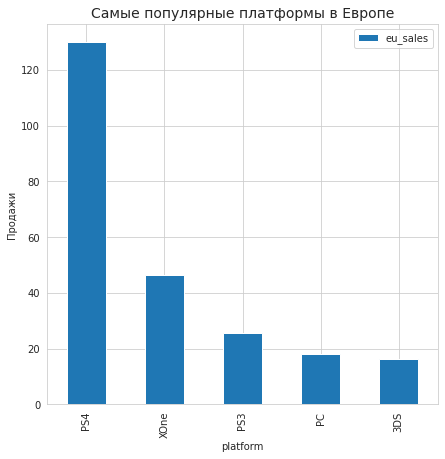

In [66]:
# топ популярных платформ Европа
eu_sales = historic_data.query('eu_sales > 0')
customer_eu_platform = pd.pivot_table(
    eu_sales, index='platform', values='eu_sales', aggfunc='sum'
).sort_values('eu_sales', ascending=False).reset_index()
customer_eu_platform[:5].plot(x='platform', y='eu_sales', kind='bar', figsize=(7, 7))
plt.title('Самые популярные платформы в Европе', size=14)
plt.ylabel('Продажи')

Text(0, 0.5, 'Продажи')

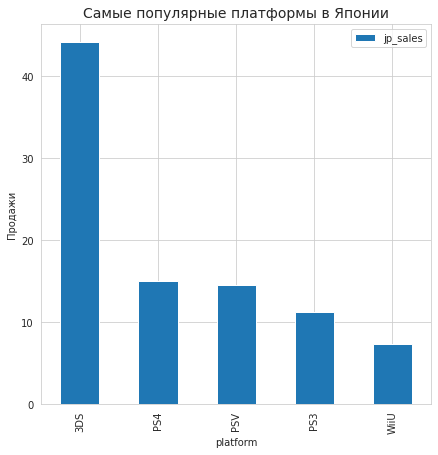

In [67]:
# топ популярных платформ Япония
jp_sales = historic_data.query('jp_sales > 0')
customer_jp_platform = pd.pivot_table(
    jp_sales, index='platform', values='jp_sales', aggfunc='sum'
).sort_values('jp_sales', ascending=False).reset_index()
customer_jp_platform[:5].plot(x='platform', y='jp_sales', kind='bar', figsize=(7, 7))
plt.title('Самые популярные платформы в Японии', size=14)
plt.ylabel('Продажи')

**Вывод:**

Рейтинг платформ Топ-5: - Северная Америка: 'X360', 'PS3', 'PS4', 'XOne', '3DS'. Европа: 'PS3', 'PS4', 'X360', '3DS', 'PS'. Япония: '3DS', 'PS3', 'PSP',  'PSV', 'PS4'. Можно сказать, что Sony держит первое место, соревнуясь с Microsoft в Сев Америке и Nintendo в Японии.

Text(0, 0.5, 'Продажи')

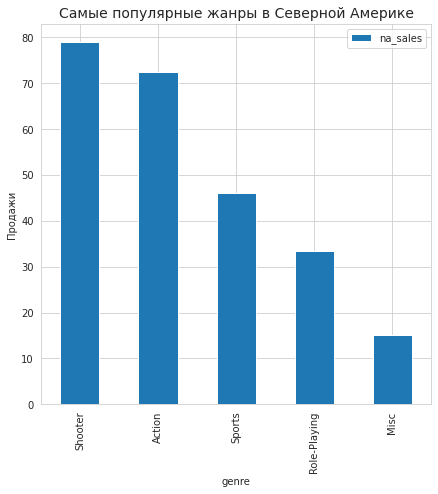

In [68]:
# топ популярных жанров Северная Америка
na_sales = historic_data.query('na_sales > 0')
customer_na_genre = pd.pivot_table(
    na_sales, index='genre', values='na_sales', aggfunc='sum'
).sort_values('na_sales', ascending=False).reset_index()
customer_na_genre[:5].plot(x='genre', y='na_sales', kind='bar', figsize=(7, 7))
plt.title('Самые популярные жанры в Северной Америке', size=14)
plt.ylabel('Продажи')

Text(0, 0.5, 'Продажи')

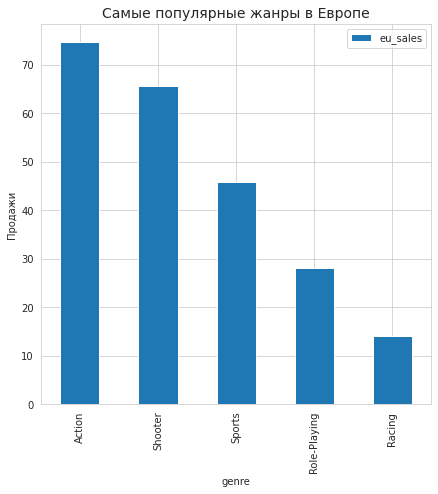

In [69]:
# топ популярных жанров Европа
eu_sales = historic_data.query('eu_sales > 0')
customer_eu_genre = pd.pivot_table(
    eu_sales, index='genre', values='eu_sales', aggfunc='sum'
).sort_values('eu_sales', ascending=False).reset_index()
customer_eu_genre[:5].plot(x='genre', y='eu_sales', kind='bar', figsize=(7, 7))
plt.title('Самые популярные жанры в Европе', size=14)
plt.ylabel('Продажи')

Text(0, 0.5, 'Продажи')

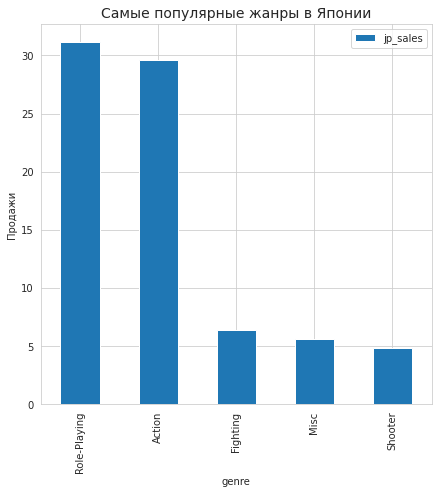

In [70]:
# топ популярных жанров Япония
jp_sales = historic_data.query('jp_sales > 0')
customer_jp_genre = pd.pivot_table(
    jp_sales, index='genre', values='jp_sales', aggfunc='sum'
).sort_values('jp_sales', ascending=False).reset_index()
customer_jp_genre[:5].plot(x='genre', y='jp_sales', kind='bar', figsize=(7, 7))
plt.title('Самые популярные жанры в Японии', size=14)
plt.ylabel('Продажи')

**Вывод:**

Рейтинг жанров Топ-5:

- Северная Америка: 'Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'

- Европа: 'Action', 'Shooter', 'Sports','Role-Playing', 'Racing'

- Япония: 'Role-Playing', 'Action', 'Misc', 'Fighting', 'Platform'


Первые 4 жанра в Америке и Европе практически совпадают. В Японии  на первом месте 'Role-Playing'

In [71]:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = historic_data.groupby(groupby).agg(
        {region_sales: 'sum'}
    ).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'Северная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония'}
    plot = pivot.plot(kind='bar', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=16, rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

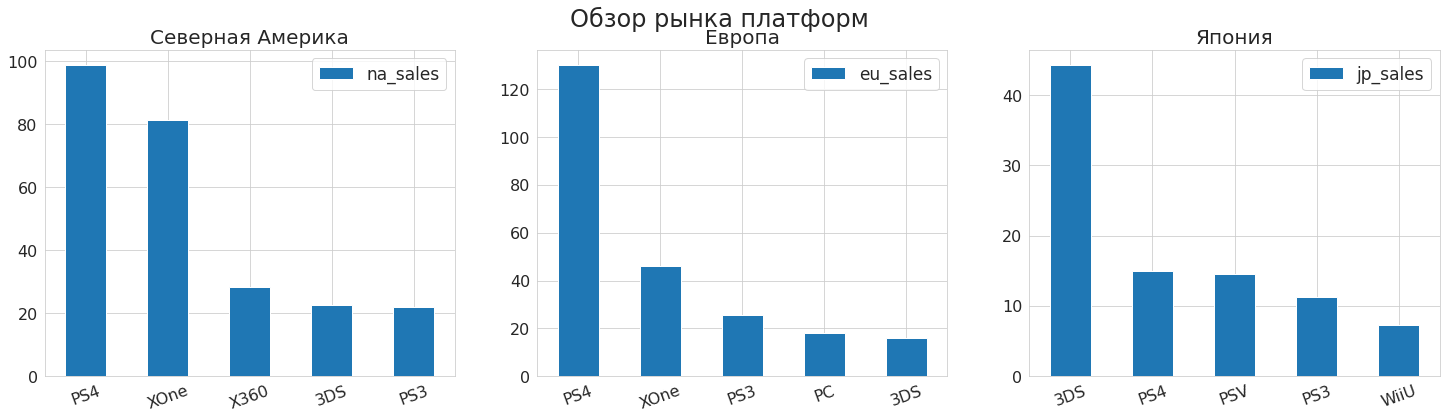

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
fig.suptitle('Обзор рынка платформ', fontsize=24)

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

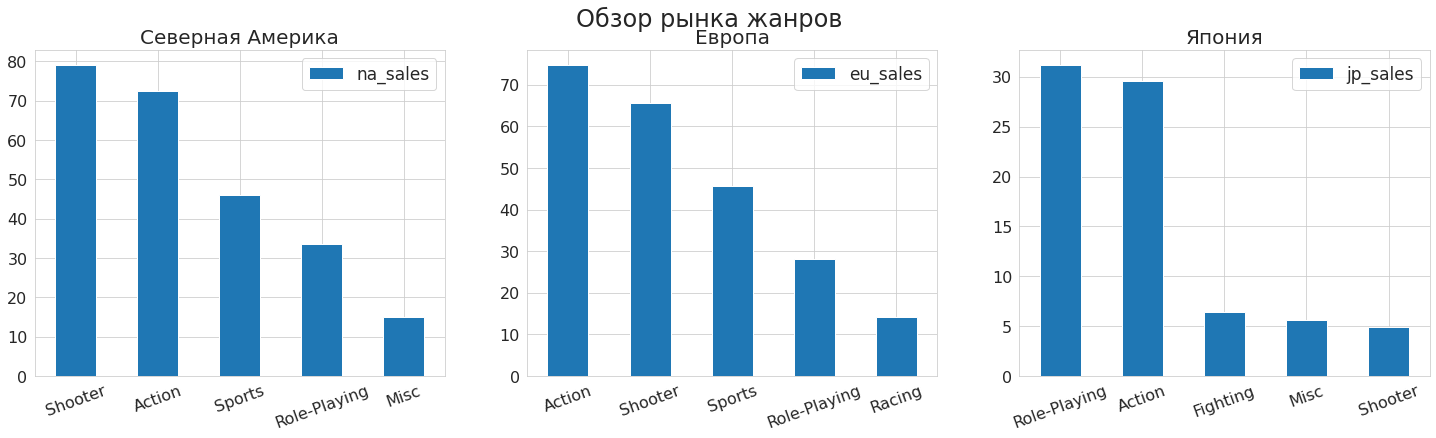

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
fig.suptitle('Обзор рынка жанров', fontsize=24)

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

#### check

In [74]:
# check
# import pandas as pd
df_app = pd.DataFrame([['ps',1,2,3],
                   ['xone',3,5,6],
                   ['pc',8,9,10],
                   ['ps3',1,7,3],
                   ['ps4',5,2,3]], columns=['platform', 'eu','jp','na'])
display(df_app)

df_other = df_app[3:]
df_other = df_other.append({'platform': 'Other', 'eu': df_app['eu'].sum()-df_app['eu'][3:].sum(),
                  'jp': df_app['jp'].sum()-df_app['jp'][3:].sum(),
                  'na': df_app['na'].sum()-df_app['na'][3:].sum()}, ignore_index = True)
df_other

,platform,eu,jp,na
0,ps,1,2,3
1,xone,3,5,6
2,pc,8,9,10
3,ps3,1,7,3
4,ps4,5,2,3


,platform,eu,jp,na
0,ps3,1,7,3
1,ps4,5,2,3
2,Other,12,16,19


In [75]:
df = historic_data.pivot_table(
    index='platform', values= ['jp_sales'], aggfunc='sum'
).sort_values(by=['jp_sales'], ascending=False)
df.reset_index(inplace= True )
df_other = df[:5]
df_other = df_other.append(
    {
        'platform': 'Other',
        'jp_sales': df['jp_sales'][5:].sum(),
    },
        ignore_index = True
)
df_other.set_index('platform', inplace= True)
display(df_other)

def top_in_regions_plot(groupby, region_sales, ax):
    df = historic_data.pivot_table(
        index= groupby, values= region_sales, aggfunc='sum'
    ).sort_values(by=region_sales, ascending=False)
    df.reset_index(inplace= True )
    df_other = df[:5]
    df_other = df_other.append(
        {
            groupby: 'Other',
            region_sales: df[region_sales][5:].sum(),
        },
        ignore_index = True
    )
    title_dict = {'na_sales': 'Северная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония'}
    df_other.set_index(groupby, inplace= True)
    plot = df_other.plot(y=region_sales, kind='pie', title=title_dict[region_sales], label=groupby, ax=axes[ax], 
                   fontsize=16, rot=20, autopct='%.2f%%')
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
Other,0.76


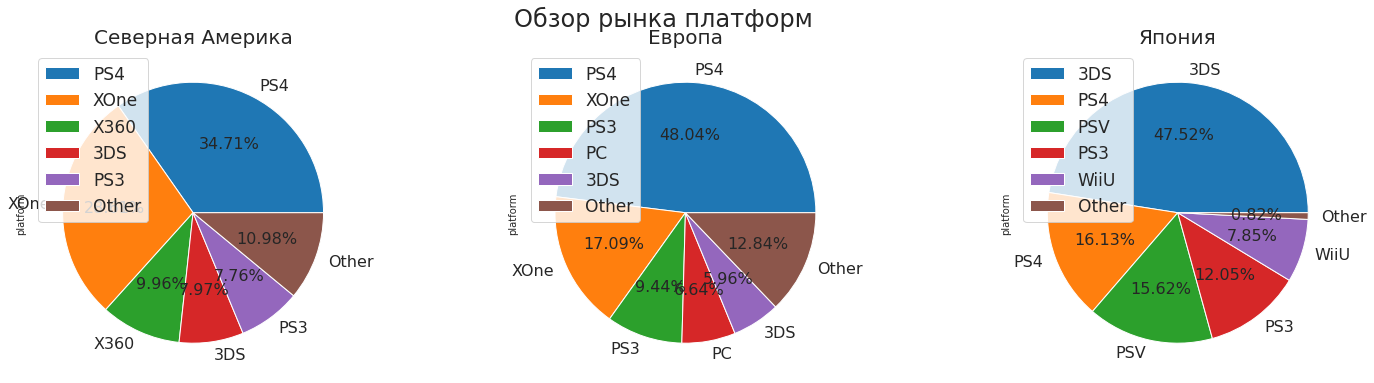

In [76]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
fig.suptitle('Обзор рынка платформ', fontsize=24)

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

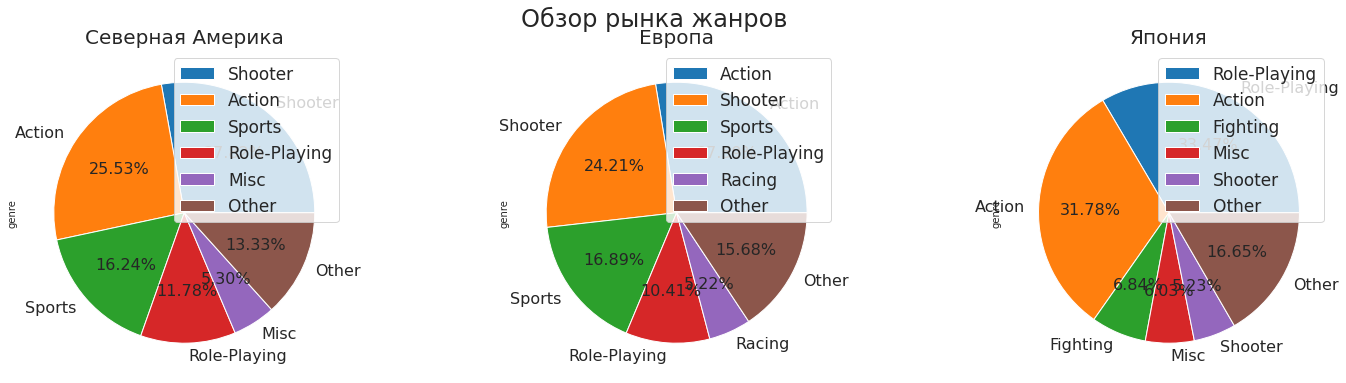

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
fig.suptitle('Обзор рынка жанров', fontsize=24)

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

In [78]:
df

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,PSP,0.36
6,XOne,0.32
7,X360,0.08
8,PC,0.00
9,Wii,0.00


In [79]:
# check
df['jp_sales'].sum()-df['jp_sales'][:5].sum(), df['jp_sales'][5:].sum()

(0.7599999999999909, 0.7600000000000001)

Text(0, 0.5, 'Продажи')

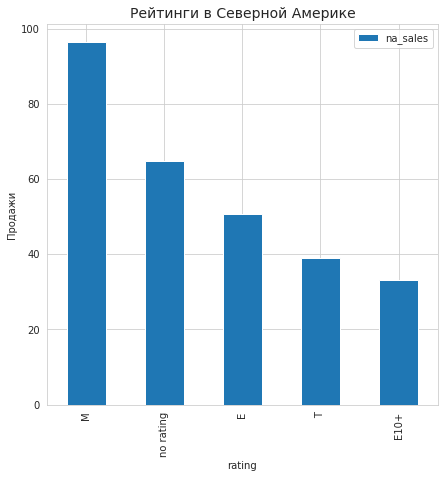

In [80]:
# влияет ли рейтинг ESRB на продажи в отдельном регионе
# влияние рейтинга в США
na_sales = historic_data.query('na_sales > 0')
customer_na = pd.pivot_table(na_sales, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False).reset_index()
customer_na[:5].plot(x='rating', y='na_sales', kind='bar', figsize=(7, 7))
plt.title('Рейтинги в Северной Америке', size=14)
plt.ylabel('Продажи')


Text(0, 0.5, 'Продажи')

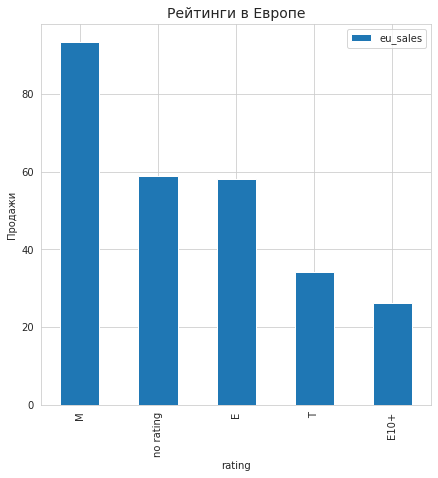

In [81]:
# влияние рейтинга в Европе
eu_sales = historic_data.query('eu_sales > 0')
customer_eu = pd.pivot_table(eu_sales, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index()
customer_eu[:5].plot(x='rating', y='eu_sales', kind='bar', figsize=(7, 7))
plt.title('Рейтинги в Европе', size=14)
plt.ylabel('Продажи')

Text(0, 0.5, 'Продажи')

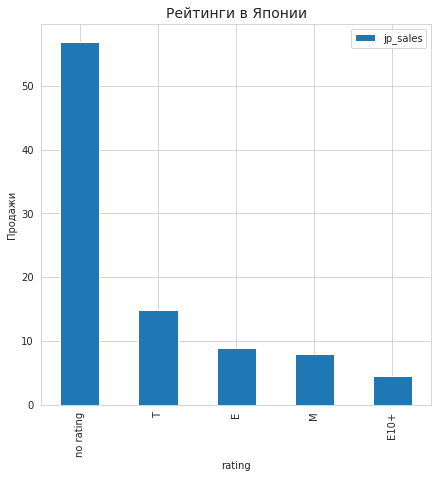

In [82]:
# топ популярных жанров Япония
jp_sales = historic_data.query('jp_sales > 0')
customer_jp = pd.pivot_table(jp_sales, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index()
customer_jp[:5].plot(x='rating', y='jp_sales', kind='bar', figsize=(7, 7))
plt.title('Рейтинги в Японии', size=14)
plt.ylabel('Продажи')

**Вывод:**

- в Японии лидируют игры для всех, на втором месте для возраста 13-19 лет. Необходимо обратить внимание что 1-м месте игры без рейтинга.
- в Европе и Америке игры для людей старше 17 лет, на втором месте с большим отрывом игры для всех. Игры без рейтинга на 2-м месте.

**Портрет пользователя:**

- В Японии значительная часть игроков в возрасте 13-19 лет. Основной жанр 'Role-Playing'. Топ-платформа 3DS.
- В Сев Америке и Европе  возраст 17. Жанры 'Action'и 'Shooter'. Платформа в Сев Америке Х360, Европе PS3&PS4. 

### Проверка гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H₀: две эти группы демонстрируют пользовательские рейтинги. Стат.значимых различий нет.

H₁: две эти группы демонстрируют пользовательские рейтинги. Стат. значимые различия есть.

In [83]:
# периоды выравнены - с 2014 г., так как XOne выпущена недавно
hypo_one=historic_data.query('user_score >= 0')

In [84]:
# дисперсии
print( np.var(hypo_one.query('platform =="XOne"')['user_score']))
print( np.var(hypo_one.query('platform =="PC"')['user_score']))

1.8795460055096425
2.8773743617307175


разница дисперсии больше 5%, параметр equal_var = False

In [85]:
alpha = 0.05

results = st.ttest_ind(
    hypo_one.query('platform =="XOne"')['user_score'], hypo_one.query('platform =="PC"')['user_score'], equal_var = False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.11601398086668832
Не отвергаем нулевую гипотезу


**Вывод:**

- Не отвергаем нулевую гипотезу, полученные данные не отвергают **утверждение**, что **cредние пользовательские рейтинги платформ XOne и PC одинаковые.**

**Cредние пользовательские рейтинги жанров Action и Sports одинаковые**

H₀: две эти группы демонстрируют пользовательские рейтинги жанров Action и Sports. Стат.значимых различий нет.

H₁: две эти группы демонстрируют пользовательские рейтинги жанров Action и Sports. Стат. значимые различия есть.

In [87]:
# данные, в отличе от проверки первой гипотезы за весь период
hypo_two =games.query('user_score >= 0')

In [88]:
# дисперсии
print( np.var(hypo_two.loc[hypo_two['genre']=='Action', 'user_score']))
print( np.var(hypo_two.loc[hypo_two['genre']=='Sports', 'user_score']))

2.03063665382663
2.594160671177017


так как разница дисперсии больше 5%, параметр equal_var = False

In [89]:
alpha = 0.05

results = st.ttest_ind(hypo_two.query('genre =="Action"')['user_score'],
                       hypo_two.query('genre =="Sports"')['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.11483818791498286
Не отвергаем нулевую гипотезу


**Вывод:**

- Не твергаем нулевую гипотезу, полученные данные не отвергают **утверждение**, что **средние пользовательские рейтинги жанров Action и Sports одинаковые**.

### Общий вывод

- Рынок игр находится в стадии спада.
- Цикл жизни платформы 10 лет. Возможно он будет сокращаться.
- При разработке маркетинговой стратегии нужно учитывать, что оценки критиков влияют на продажи с положительной корреляцией, связи продаж с оценками пользователей нет
- Хорошо продаваемые жанры Shooter, Platform, Sports, Role-Playing
- Плохо продаваемые жанры Strategy, Puzzle, Aventure

Рекоммендации на основе анализа за 5 лет:

- при продаже игр в Северной Америке и Европе нужно ориентироваться на возрастную категорию 17+ в жанре экшен на платформах XOne для Сев Америки(PS3&PS4 вторая группа) и  PS4 для Европы. 
- при продаже игр в Японии нужно ориентироваться на массовую и возрастную категорию 13-19 лет в жанре ролевых игр 3DS.Обратить внимание на игры с пометкой no rating.

Рекоммендации для бизнеса:

- заполнять набор данных без пропусков

### Бонус

In [90]:
data_games = pd.read_csv('/datasets/games.csv')

In [91]:
data_games.columns = map(str.lower, data_games.columns)

In [92]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [93]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan).astype('float')

In [94]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [95]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [96]:
# check
# круги + категория другие
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
    labels_c=sales.platform
    colours = {'Wii':'C0', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'steelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'C14', '2600':'C15', 'PSP':'C16', 
               'XOne':'C17',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

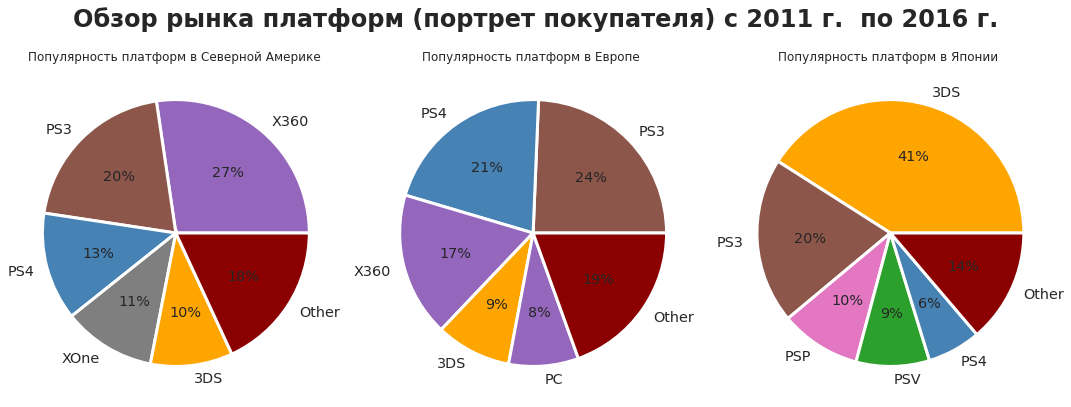

In [97]:
# check
# круги в ряд

x_year = 2011

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в5</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Оптимальный период для исследования 2014-2016 гг., т.к. данные за 2016 г. неполные

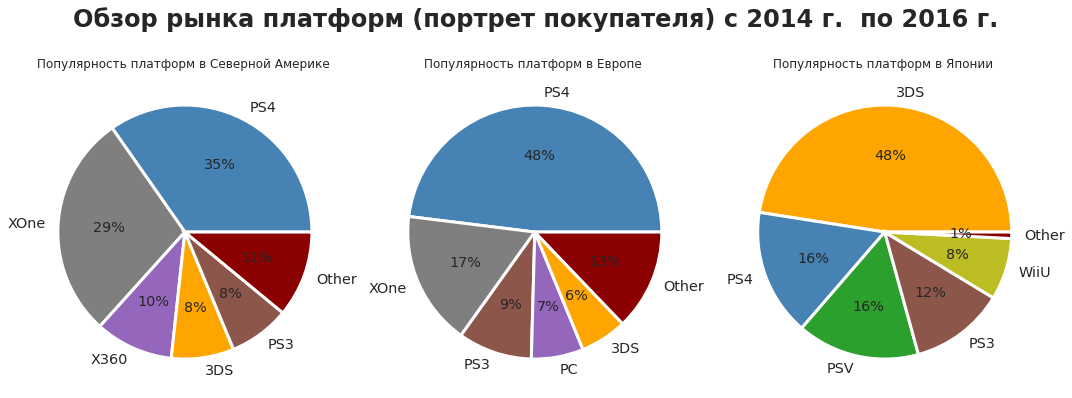

In [98]:
# check
# круги в ряд

x_year = 2014

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

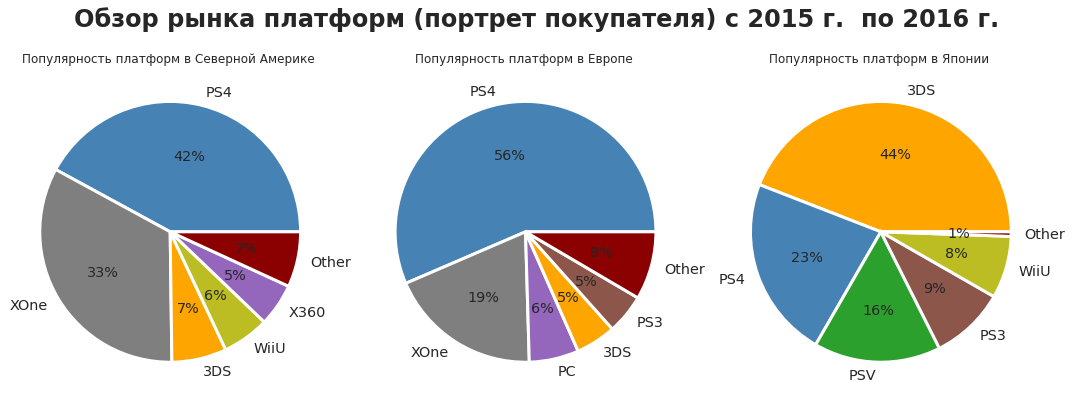

In [99]:
# check
# круги в ряд

x_year = 2015

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])